In [ ]:
! pip install split-folders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import random
import cv2
from google.colab.patches import cv2_imshow as imshow
import sklearn
import tensorflow as tf
import gdown
import pandas as pd
from imageio import imread

from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
import keras

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, Input, Flatten, Dense, Reshape

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1Sp4X__qo6XSR17_uBF68tP7EkQPHwO-m'
output = 'train.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Sp4X__qo6XSR17_uBF68tP7EkQPHwO-m
To: /content/train.zip
50.2MB [00:00, 64.9MB/s]


'train.zip'

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1iUsQ3ZTPX6g7zE9ubKllYhZeOTi9eoUC'
output = 'test.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1iUsQ3ZTPX6g7zE9ubKllYhZeOTi9eoUC
To: /content/test.zip
17.0MB [00:00, 48.3MB/s]


'test.zip'

Using Tensorflow-Gpu version 

In [ ]:
 print(tf.__version__)

2.4.1


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [ ]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
train_zip = '/content/train.zip'
zip_ref = zipfile.ZipFile(train_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
test_zip = '/content/test.zip'
zip_ref = zipfile.ZipFile(test_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Importing the Image into the Program

In [ ]:
%pylab inline
import os
import random

import pandas as pd
from imageio import imread

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imshow', 'random', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Loading the CSV files

In [ ]:
root_dir = os.path.abspath('/content/')
data_dir = '/content/'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

## Print an image

In [ ]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train', img_name))

print('Age: ', train.Class[i])

Age:  MIDDLE


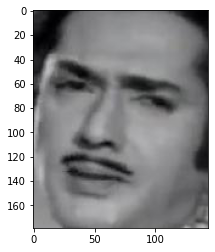

In [ ]:
imshow(img)

Image importing DONE!!!

## Resizing the Image | Train and Test

In [ ]:
from skimage.transform import resize

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = resize(img, (64, 64))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)
train_x = np.stack(temp)

In [ ]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = resize(img, (64, 64))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

## Normalising the Data

In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.

# Finding the Distribution of the classes

In [ ]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [ ]:
#test['Class'] = 'MIDDLE'
#test.to_csv('Trial1.csv', index=False)

### Notes:
So we can see that when we made the Entire Output file as "MIDDLE" class, due to the high number of MIDDLE classes we automatically got a result greater than 50%.

## Creating a Model

We made the output into a Categorical Value for Training the Neural Net.

In [ ]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=20)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = to_categorical(train_y)

Specifying the Parameters

Import Neccessary Modules

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer,Conv2D, MaxPooling2D,Activation, Dropout

In [ ]:
input_shape=(64, 64, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(30, kernel_size=5, activation='relu', input_shape=(64, 64, 3)))
#model.add(Dropout(0.4))
#model.add(Conv2D(60, kernel_size=5, activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.32))

model.add(Conv2D(150, kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(125, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.32))

#model.add(Conv2D(155, kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.32))



model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 60, 60, 30)        2280      
_________________________________________________________________
batch_normalization_41 (Batc (None, 60, 60, 30)        120       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 30, 30, 30)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 30, 30, 30)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 150)       40650     
_________________________________________________________________
batch_normalization_42 (Batc (None, 28, 28, 150)       600       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 150)     

In [ ]:
#Setting the parameters for Adam
#keras.optimizers.Adam(lr=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-04, decay=0.0000)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y, 
          batch_size=200,
          shuffle=True,
          epochs=100,verbose=1,
          validation_split=0.2,
          callbacks=[lr_reducer,early_stopper])

Epoch 1/100
80/80 [==============================] - 3s 30ms/step - loss: 1.2577 - accuracy: 0.5098 - val_loss: 1.6807 - val_accuracy: 0.1163
Epoch 2/100
80/80 [==============================] - 2s 27ms/step - loss: 0.8580 - accuracy: 0.5996 - val_loss: 3.1489 - val_accuracy: 0.1163
Epoch 3/100
80/80 [==============================] - 2s 28ms/step - loss: 0.8049 - accuracy: 0.6305 - val_loss: 4.8046 - val_accuracy: 0.1163
Epoch 4/100
80/80 [==============================] - 2s 28ms/step - loss: 0.7707 - accuracy: 0.6583 - val_loss: 4.1790 - val_accuracy: 0.1163
Epoch 5/100
80/80 [==============================] - 2s 28ms/step - loss: 0.7367 - accuracy: 0.6832 - val_loss: 3.3553 - val_accuracy: 0.1163
Epoch 6/100
80/80 [==============================] - 2s 28ms/step - loss: 0.7039 - accuracy: 0.6917 - val_loss: 3.1002 - val_accuracy: 0.1163
Epoch 7/100
80/80 [==============================] - 2s 28ms/step - loss: 0.6792 - accuracy: 0.7017 - val_loss: 2.6130 - val_accuracy: 0.1256
Epoch 

Earlier we used our whole trainset, but that was not useful because we couldnt validate it.So we split the training into a Train+Validation Set 

So here we resized the image in order to see it and check if our prediction is matching our training  values.

Creating the result using the trained model with Test as the new input

In [ ]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv("Set82.csv", index=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Testing

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Original: MIDDLE Predicted: MIDDLE


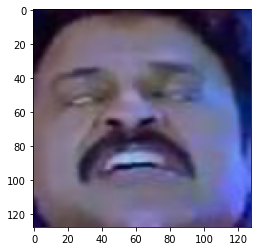

In [ ]:

i = random.choice(train.index)
img_name = train.ID[i]

img = imread(os.path.join(data_dir, 'Train', img_name)).astype('float32')
plt.imshow((resize(img, (128, 128))).astype(np.uint8))

#The model.predict gives the prediction for the given train set
pred = model.predict_classes(train_x)
#print(pred)

#We then take the prediction set and find if the class it predicted is the one that it is.
print('Original:', train.Class[i], 'Predicted:', lb.inverse_transform(pred)[i])